

# Project: TMDB-movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I chose the TMDB-movies to do an analysis on it. I wrote this summary after I have finished the analysis part. I really enjoyed doing this project and I hope I did well!. 

> Through the analysis step, starting with loading the data and discovering the dataset features and datatypes thinking about the most important part in data analysis (What can we conclude or benefit from this data) and I came up with several questions and I picked two questions.

> I removed many unuseful columns in my case or the columns that not related to the two questions I have picked. Also, these columns lack a lot of rows so getting rid of them was a good idea.


### The features that I used are:
>budget

>release_year

>vote_average

I have 5 questions but I'll pick 2

The questions are:

1.	Are movies with larger budget receive better ratings?
2.	Are the cast effects on the popularity of the movie?
3.	Which genre makes more revenue?
4.	Which decade had the best movies ratings?
5.	Is the director play important role in the quality of the movie?

## These questions that I'm going to answer:
#### 1.	Are movies with larger budget receive better ratings?
#### 4.	Which decade had the best movies ratings?






------------

### Let's start our analysis journeyz

In [1]:
# Needed Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Load your data and print out a few lines. 
df = pd.read_csv('tmdb-movies.csv')

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape # View the dataset Dimensions

(10866, 21)

# Find missing and duplicate data

In [5]:
# Find Missing data in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# Find duplicated data
print('Number of duplicated data is', str(len(df[df.duplicated() == True])))

Number of duplicated data is 1



## Data Cleaning: 

### (1)
### Remove duplicated data

#### I found some of the data are missing and also the dataset has 1 duplicated data. So, I'm going to clean these.

In [7]:
df.drop_duplicates(inplace= True)

# Check if the duplicated row is dropped
print('Number of duplicated data is', str(len(df[df.duplicated() == True])))

Number of duplicated data is 0


### (2)
### Dealing with missing data

Some columns have a lot of missing data and also they're not needed so, i'm simply going to drop those columns 

In [8]:

df.drop(columns=['id', 'imdb_id', 'tagline', 'keywords', 'overview', 'homepage', 'cast' , 'director', 'production_companies'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10865 non-null  float64
 1   budget          10865 non-null  int64  
 2   revenue         10865 non-null  int64  
 3   original_title  10865 non-null  object 
 4   runtime         10865 non-null  int64  
 5   genres          10842 non-null  object 
 6   release_date    10865 non-null  object 
 7   vote_count      10865 non-null  int64  
 8   vote_average    10865 non-null  float64
 9   release_year    10865 non-null  int64  
 10  budget_adj      10865 non-null  float64
 11  revenue_adj     10865 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.1+ MB


#### genres has some null data I'll repalce them by not determined

In [9]:
df['genres'].fillna('not determined', inplace=True)

### (3)
### Convert date from str to datetime

In [10]:

# release_year 
# release_date
df['release_date'] = pd.to_datetime(df['release_date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10865 non-null  float64       
 1   budget          10865 non-null  int64         
 2   revenue         10865 non-null  int64         
 3   original_title  10865 non-null  object        
 4   runtime         10865 non-null  int64         
 5   genres          10865 non-null  object        
 6   release_date    10865 non-null  datetime64[ns]
 7   vote_count      10865 non-null  int64         
 8   vote_average    10865 non-null  float64       
 9   release_year    10865 non-null  int64         
 10  budget_adj      10865 non-null  float64       
 11  revenue_adj     10865 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(2)
memory usage: 1.1+ MB


### Now, the dataset is clean and ready for the exploration and analysis phase.   (:

> ##############
> ##############

<a id='eda'></a>
## Exploratory Data Analysis

### Quick investigations about the relationships between the features

<AxesSubplot:>

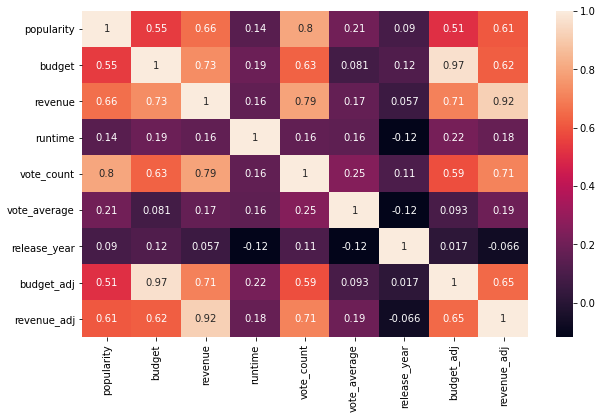

In [12]:
# Find correlations between the features.
import seaborn as sns
df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

### let's see the realtionship between relase_year and the budget

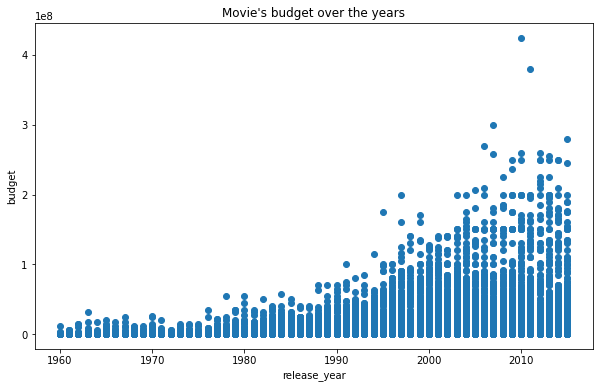

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(df['release_year'], df['budget'])
plt.title("Movie's budget over the years")
plt.xlabel('release_year')
plt.ylabel('budget')
plt.show()

Here is a scatter plot show the relationship between budget and release year and as we can see the budget increases over the years

In [14]:
df[['budget', 'budget_adj']].head() # check the diffrenece between budget and budget_adj

,budget,budget_adj
0,150000000,1.379999e+08
1,150000000,1.379999e+08
2,110000000,1.012000e+08
3,200000000,1.839999e+08
4,190000000,1.747999e+08


##### Quick statistic check for the budget column

In [15]:
df['budget'].describe() 

count    1.086500e+04
mean     1.462429e+07
std      3.091428e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      4.250000e+08
Name: budget, dtype: float64

> It seems there is a problem

#### check the budget unique values

In [16]:
df['budget'].unique() 

array([150000000, 110000000, 200000000, 190000000, 135000000, 155000000,
       108000000,  74000000, 175000000, 245000000, 176000003,  15000000,
        88000000, 280000000,  44000000,  48000000, 130000000,  95000000,
       160000000,  30000000,  40000000,  28000000,  68000000,  81000000,
        20000000,  61000000,         0,  49000000,  29000000,  58000000,
         6000000,  50000000,  11000000,  90000000,  75000000,  25000000,
        10000000,  12000000,   4000000,  11800000,  35000000,  55000000,
        60000000, 105000000,  26000000,  70000000, 120000001,   3500000,
        65000000,  50100000, 100000000,  13000000,  99000000,   2500000,
        34000000,  80000000,  17000000,  31000000,   5000000,  64000000,
        11930000,   8500000,  23000000,  53000000,   8900000,    700000,
        14800000,  19500000,   1000000,   8000000,   1800000,   2000000,
        18000000,    630019,  14000000,  37000000,   7000000,   3000000,
         9600000,   2240000,   3300000,    100000, 

I try to find the mean to split the data to greater or equal than the and less than the mean, but we have a problem here, the zeros causes problem in calculting the mean and the median. Filling them by the mean won't be a good idea as i think. Instead I'm going to drop those zeros and store the result in other new dataset.

#### Any movie with budget less than 5000 will be dropped

In [17]:
zeros_indx = df[df['budget'] < 5000].index
df_no_zeros = df.drop(index= zeros_indx)
df_no_zeros

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
10835,0.299911,12000000,20000000,The Sand Pebbles,182,Action|Adventure|Drama|War|Romance,2066-12-20,28,7.0,1966,8.061618e+07,1.343603e+08
10841,0.264925,75000,0,The Shooting,82,Western,2066-10-23,12,5.5,1966,5.038511e+05,0.000000e+00
10848,0.207257,5115000,12000000,Fantastic Voyage,100,Adventure|Science Fiction,2066-08-24,42,6.7,1966,3.436265e+07,8.061618e+07
10855,0.141026,700000,0,The Ghost & Mr. Chicken,90,Comedy|Family|Mystery|Romance,2066-01-20,14,6.1,1966,4.702610e+06,0.000000e+00


In [18]:
df_no_zeros['budget'].min()  # Check the minimum 

5000

In [19]:
df_no_zeros['budget'].mean()

31106667.382341426

### Split the data into 2 datasets ( greater than or equal and less than the mean)

>The splitting will be based on the mean of the budget

#### Greater than or equal dataset

In [20]:
df_gt = df_no_zeros.query('budget >= 31106667')  # Greater than or equal
df_gt

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
10335,0.321865,35000000,4858139,Little Buddha,140,Drama|History,1993-12-01,33,5.8,1993,5.283145e+07,7.333215e+06
10443,0.804533,31115000,57750000,Cleopatra,248,Drama|History|Romance,2063-06-12,68,6.3,1963,2.215444e+08,4.111904e+08
10483,1.045604,40000000,1641825,Pirates,124,Adventure|Comedy,1986-05-08,22,6.2,1986,7.957626e+07,3.266257e+06
10488,0.969383,37000000,37962774,Howard the Duck,110,Fantasy|Comedy|Science Fiction,1986-08-01,105,4.9,1986,7.360804e+07,7.552339e+07


#### below the mean of the budget  dataset

In [21]:
df_lt = df_no_zeros.query('budget < 13094493') # less than
df_lt

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
35,3.557846,6000000,35401758,Room,117,Drama|Thriller,2015-10-16,1520,8.0,2015,5.519998e+06,3.256960e+07
39,3.227329,11000000,62076141,Brooklyn,111,Drama|Romance,2015-11-04,754,7.3,2015,1.012000e+07,5.711002e+07
45,3.023253,10000000,14333790,Hardcore Henry,97,Action|Adventure|Science Fiction,2015-09-12,396,5.9,2015,9.199996e+06,1.318708e+07
47,2.968254,12000000,85512300,Paper Towns,109,Drama|Mystery|Romance,2015-07-09,1252,6.2,2015,1.104000e+07,7.867128e+07
49,2.885126,4000000,9064511,The Lobster,118,Thriller|Comedy|Drama|Romance|Science Fiction,2015-10-08,638,6.6,2015,3.679998e+06,8.339346e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
10835,0.299911,12000000,20000000,The Sand Pebbles,182,Action|Adventure|Drama|War|Romance,2066-12-20,28,7.0,1966,8.061618e+07,1.343603e+08
10841,0.264925,75000,0,The Shooting,82,Western,2066-10-23,12,5.5,1966,5.038511e+05,0.000000e+00
10848,0.207257,5115000,12000000,Fantastic Voyage,100,Adventure|Science Fiction,2066-08-24,42,6.7,1966,3.436265e+07,8.061618e+07
10855,0.141026,700000,0,The Ghost & Mr. Chicken,90,Comedy|Family|Mystery|Romance,2066-01-20,14,6.1,1966,4.702610e+06,0.000000e+00


In [22]:
df_lt['budget'].min()    # Check the mean

5000

#### The mean for upper data

In [23]:

df_gt['vote_average'].mean()


6.092481203007518

#### The mean for lower data

In [24]:
df_lt['vote_average'].mean()

5.976283846872082

### Plotting the results for Q1

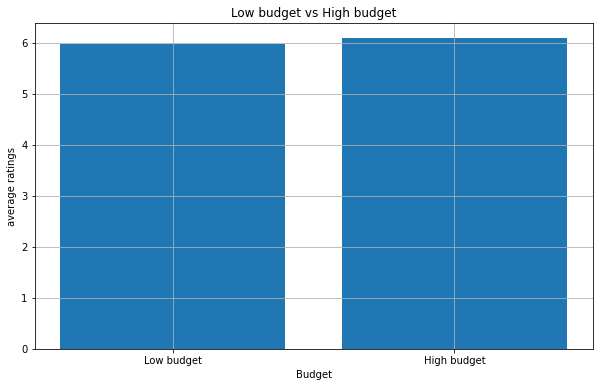

In [25]:
pos= [1,2]
tick = ['Low budget', 'High budget']

plt.figure(figsize=(10,6))
plt.bar(pos, [df_lt['vote_average'].mean(), df_gt['vote_average'].mean()], tick_label= tick)
plt.title('Low budget vs High budget')
plt.xlabel('Budget')
plt.ylabel('average ratings')
plt.grid(True)
plt.show()

##### ----------------------

### Research Question 2: Which decade had the best movies ratings

In [26]:
average_year_ratings = df.groupby(['release_year'])['vote_average'].mean()  # to get the mean for every year from 1960 to 2015

In [27]:
average_year_ratings = list(average_year_ratings)

### Function that splits years into decades

In [28]:
def years_into_decades(list):
    leng = int(np.ceil(len(list)/10))   # This line specifies the number of decades based on the number of years
    avg_rate_decades = [] # empty list that will be used to append the average ratings for each decade

    for i in range(0, leng*10, 10):
        avg_rate_decades.append(np.mean(list[i:i+9])) #Here we take the first 10 years and take the mean from it and then append it to the empty list
    
    return avg_rate_decades

In [29]:
decades_avg_rating = years_into_decades(average_year_ratings)
decades_avg_rating

[6.280977093148428,
 6.386769609984999,
 6.091053893388139,
 5.999757518821272,
 5.930518193401429,
 5.906362246196544]

### Plotting the results for Q2

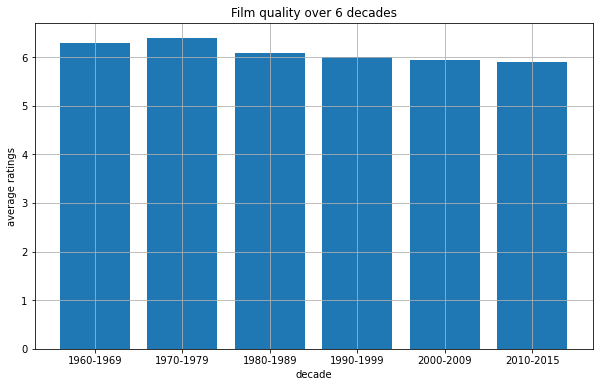

In [30]:
pos = [1,2,3,4,5, 6]
tick = ['1960-1969', '1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2015']

plt.figure(figsize=(10,6))
plt.grid(True)
plt.bar(pos, decades_avg_rating, tick_label = tick, linewidth= 9)
plt.xlabel('decade')
plt.ylabel('average ratings')
plt.title('Film quality over 6 decades')
plt.show()

It is clear that the 70's decade is the best in terms of evaluation, as it is clear from the graph that every decade in which the percentage of evaluations decreases.

<a id='conclusions'></a>
## Conclusions



In conclusion, I have examined several features, their properties. in the first section, I decided which features I need to use and which features must be dropped. Then, I made some quick exploring between the features and visualize the results.

In the next steps and In preparing the data for the analysis I found that the budget's feature has unreasonable budget values for movies. I decided to remove any budget value under 5000.  After that, I split the data into 2 datasets one for the data that greater or equal than the budget's mean and the other for the data below the budget's mean.

Finally, I concluded the project by plotting the results for the two questions and put appropriate comments for each.

### Findings
##### For Q1
 1) Large budget movies don't mean necessarily the movie will have high rates.

##### For Q2
1) Old movies have a higher average rate than current movies.

2) With every decade the movies ratings decreases.\

3) In the next decade, the average rating is expected to reach 5.5

### limitations

The first thing I have encountered the missing data are huge in some columns. There Are questions that I wanted to work on but unfortunately, the data didn't help and if I worked on them mostly I'll end with inaccurate analysis. After analysing and exploring the data features I picked those two questions.

In the second question, it seems the movies not good as before, this is because in the current decade the number of films shown is much more than in previous decades and they show regardless of quality.